# Les librairies

In [127]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

Chargement des données

In [128]:
data = pd.read_csv("../Data/Data_vi_marketing_campaigns.csv")
data.head(2)

,Education,Marital_Status,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Is_parent,Household,Age,Seniority,Total_Spent,Total_Accepted_Campaigns
0,Graduation,Single,58138.0,58,635,88,546,172,88,88,...,4,7,0,1,Not Parent,1,57,2,1617,0
1,Graduation,Single,46344.0,38,11,1,6,2,1,6,...,2,5,0,0,Parent,3,60,0,27,0


L'objectif de ce notebook est de réaliser une **analyse exploratoire des données client** afin de mieux comprendre leurs caractéristiques et comportements.  Cette analyse sera structurée en deux parties principales :

- Profil sociodémographique des clients
- Comportement d'achat des clients

L'analyse graphique nous aidera à visualiser ces informations et à découvrir des schémas sous-jacents, facilitant ainsi la segmentation client et l'optimisation des actions commerciales.


# 1. Profil sociodémographique des clients.

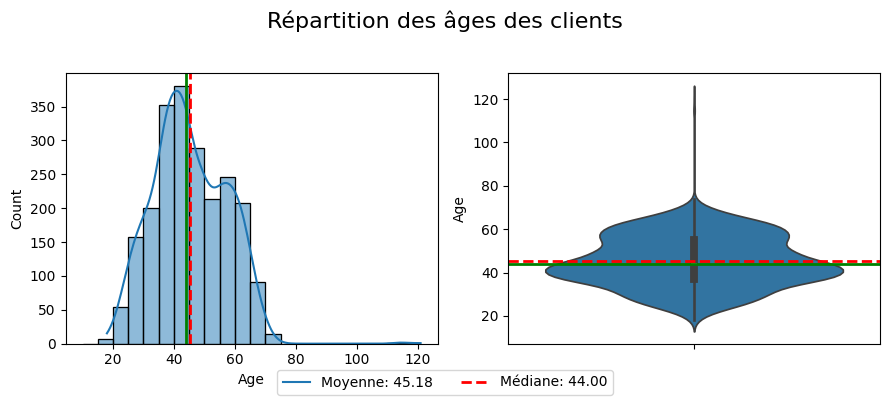

In [129]:
bins = np.arange(10, data.Age.max(), 5) 
mean_age, median_age = data.Age.mean(), data.Age.median()

fig, axes = plt.subplots(1, 2, figsize=(9, 4))

sns.histplot(data=data, x="Age", kde=True, bins=bins, ax=axes[0])
axes[0].axvline(mean_age, color='r', linestyle='--', linewidth=2)
axes[0].axvline(median_age, color='g', linestyle='-', linewidth=2)

sns.violinplot(data=data, y="Age", ax=axes[1])
axes[1].axhline(mean_age, color='r', linestyle='--', linewidth=2)
axes[1].axhline(median_age, color='g', linestyle='-', linewidth=2)

plt.suptitle('Répartition des âges des clients', fontsize=16)
fig.legend([f'Moyenne: {mean_age:.2f}', f'Médiane: {median_age:.2f}'], loc='lower center', bbox_to_anchor=(0.5, 0), ncol=2)
plt.tight_layout(rect=[0, 0, 1, 0.95]) 

plt.show()
del mean_age, median_age

Les clients sont en moyenne agés de 45 ans. On remarque cependant que très peu de clients ont plus de 75 ans.

In [130]:
print(f"""Il y a {(data.Age > 75).sum()} clients qui ont plus de 75 ans et les âges calculés sont {",".join(data[data.Age > 75]["Age"].astype(str))}.""")

Il y a 3 clients qui ont plus de 75 ans et les âges calculés sont 114,121,115.


> Ces valeurs extrêmes soulèvent des doutes quant à leur validité, suggérant qu'elles pourraient être le résultat d'erreurs dans les données. Afin d'écarter tout doute, le choix est fait de les supprimer.

In [131]:
data = data[~(data.Age > 75)]
data.shape

(2213, 23)

Niveau d'étude des clients

In [151]:
def add_annotation(ax, data):
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{int(height)} ({height/len(data):.1%})', 
                    (p.get_x() + p.get_width() / 2., height), 
                    ha='center', va='bottom', fontsize=10)

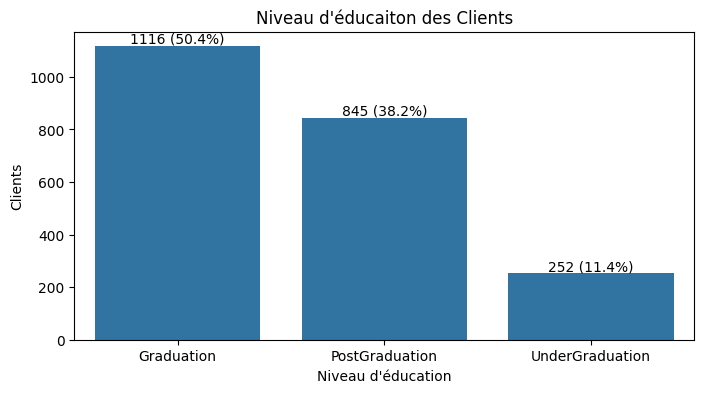

In [152]:
plt.figure(figsize=(8, 4))
ax = sns.countplot(data=data, x="Education")
add_annotation(ax, data)
plt.title("Niveau d'éducaiton des Clients")
plt.xlabel("Niveau d'éducation")
plt.ylabel("Clients")
plt.show()

> La majorité des clients ont le niveau `graduation` (1116, 50.4 % du total). Le niveau d'étude `Post-graduation` - regroupant ceux qui ont eu un master et ceux qui sont PhD - suit avec **845 clients** (38.2 %). Les clients avec un niveau `Undergraduation` sont au nombre de **252** (11.5 %) et sont relativement sous-représentés.


Situation familiale

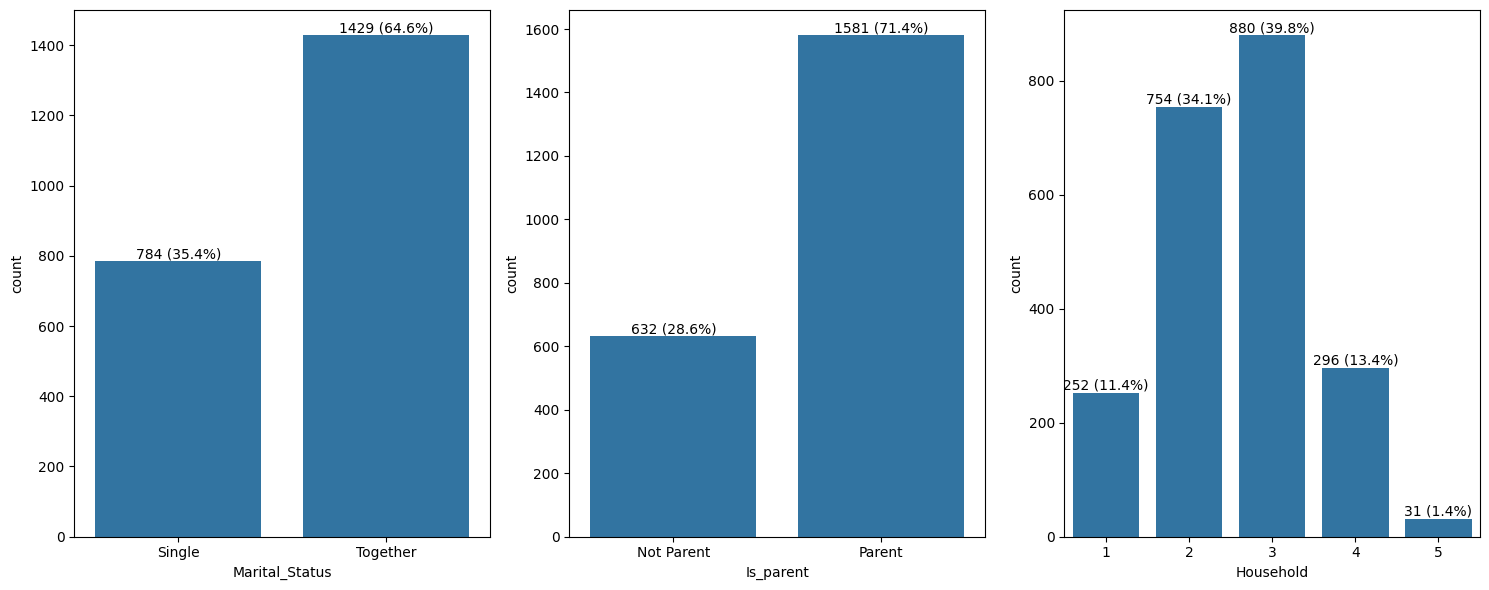

In [161]:
fig, axes = plt.subplots(1, 3, figsize=(15, 6))
plt.subplot(1, 3, 1)
ax = sns.countplot(data=data, x="Marital_Status")
add_annotation(ax, data)
plt.subplot(1, 3, 2)
ax = sns.countplot(data=data, x="Is_parent")
add_annotation(ax, data)
plt.subplot(1, 3, 3)
ax = sns.countplot(data=data, x="Household")
add_annotation(ax, data)
plt.tight_layout()

In [153]:
data.columns

Index(['Education', 'Marital_Status', 'Income', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Complain', 'Response', 'Is_parent', 'Household', 'Age', 'Seniority',
       'Total_Spent', 'Total_Accepted_Campaigns'],
      dtype='object')

ModuleNotFoundError: No module named 'plotly'

### Analyse graphique

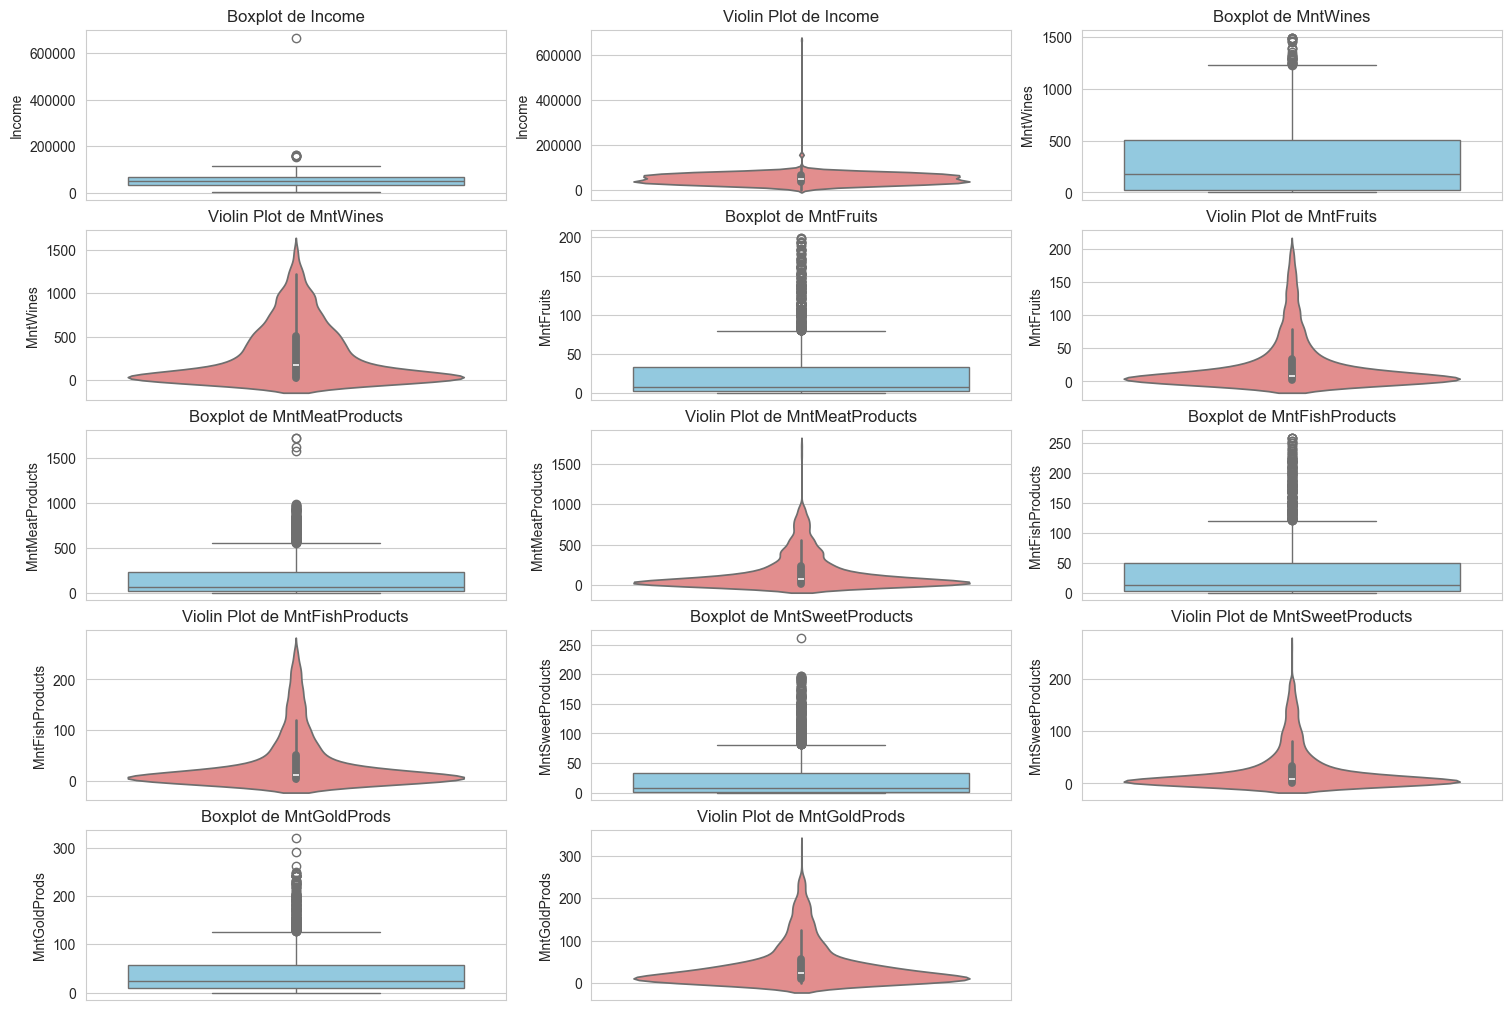

In [ ]:
sns.set_style("whitegrid")
num_vars = len(variables) * 2
n_cols = 3
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 10), constrained_layout=True)
nrows = (num_vars + ncols-1)// ncols 
axes = axes.flatten()
variables =  ["Income", "MntWines",	"MntFruits","MntMeatProducts", "MntFishProducts",	"MntSweetProducts",	"MntGoldProds"]
for i, var in enumerate(variables):
    sns.boxplot(y=var, data=df, ax=axes[2*i], color='skyblue')  
    axes[2*i].set_title(f'Boxplot de {var}', fontsize=12)
    sns.violinplot(y=var, data=df, ax=axes[2*i + 1], color='lightcoral')  
    axes[2*i + 1].set_title(f'Violin Plot de {var}', fontsize=12)

for j in range(2*i + 2, len(axes)):
    fig.delaxes(axes[j])

plt.show()
   

In [ ]:
data.to_csv("..data/Data_vi_marketing_campaigns.csv", index=False)